<a href="https://colab.research.google.com/github/ritzi12/bankruptcy_iht/blob/main/CIS_Bankruptcy_IHT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bankruptcy Prediction**

*By integrating Instance Hardness(IHT) based Under sampling and Supervised Learning Methods in highly Imbalanced dataset*



## Introduction

Bankruptcy prediction is an essential task in the financial industry, as it can help identify companies at risk of insolvency and take necessary actions to prevent or mitigate potential losses. However, the imbalanced nature of the dataset, where the number of bankrupt companies is significantly lower than the non-bankrupt ones, poses a significant challenge for traditional supervised learning methods. The classification task gets more challenging when the dataset contains both class imbalance and class overlap. The problem is further aggravated when the dataset is high dimensional having many independent variables.

**This study focuses on** overcoming the above difficulties faced due to imbalanced data, class overlapping and high dimensional data. Feature selection using various statistical techniques such as information gain, f-score, chi-square and machine learning techniques such as embedded tree based method are explored. These selected features are further used to explore various supervised classification techniques such as SVM, Xgboost, Isolation Forest and tree based algorithms specially adapted for imbalanced data. We also further enhanced the performance of these models by using Instance Hardness Threshold (IHT) based under sampling method. IHT is used to select the most difficult-to-classify instances from the majority class, which are then removed and remaining instances combined with the minority class instances to form a balanced dataset. We do comparative evaluation of performance of the models using several metrics, including accuracy, precision, recall, F1-score, and balanced accuracy with and without IHT under-sampling for  above mentioned supervised techniques.

### **Objectives**

The study proposes to achieve following objectives :
1.	To explore the instance hardness based under-sampling method in highly imbalanced dataset for classification using supervised learning method
2.	To compare the performance of supervised learning methods designed to handle highly imbalanced bankruptcy dataset.
3.	To compare and analyze the performance of supervised learning methods with and without instance hardness based under-sampling method.
4.	To combine various feature selection techniques to reduce the dimensionality of dataset.
5. To interpret model predictions using SHAP values- Force plots, summary plots , Density plots.


### Methodology

The below are the broad steps in this research study:
1. Choose candidate supervised models to conduct testing and comparison of performance. Models were chose based on prediction performance on imbalanced dataset. Candidate supervised algorithms applied are SVM, Xgboost, Isolation Forest, Balanced Random Forest, AdaBoost Classifier with integrated under-sampling, Easy Ensemble.
2. Clean dataset and perform exploratory data analysis (EDA)
3. Apply feature selection techniques such as F-score, Chi-square, Mutual Information Gain, Tree-based embedded methods – Random Forest Classifier and Extra Trees Classifier.
4. Split the dataset into Train and Test set.
5.	Apply the selected candidate supervised learning models.
6.	Compare their performance on test set using classification metrics such as accuracy, precision, recall, F1-score and balanced accuracy.
7.	Apply the Instance Hardness Threshold based under-sampling method on train dataset to reduce the imbalance in the dataset.
8.	Again apply the selected candidate supervised learning models on this under-sampled dataset
9.	Compare the performance of the models without and without IHT under-sampling.
10. SHAP Interpretation on any supported tree model out of 6 models used here

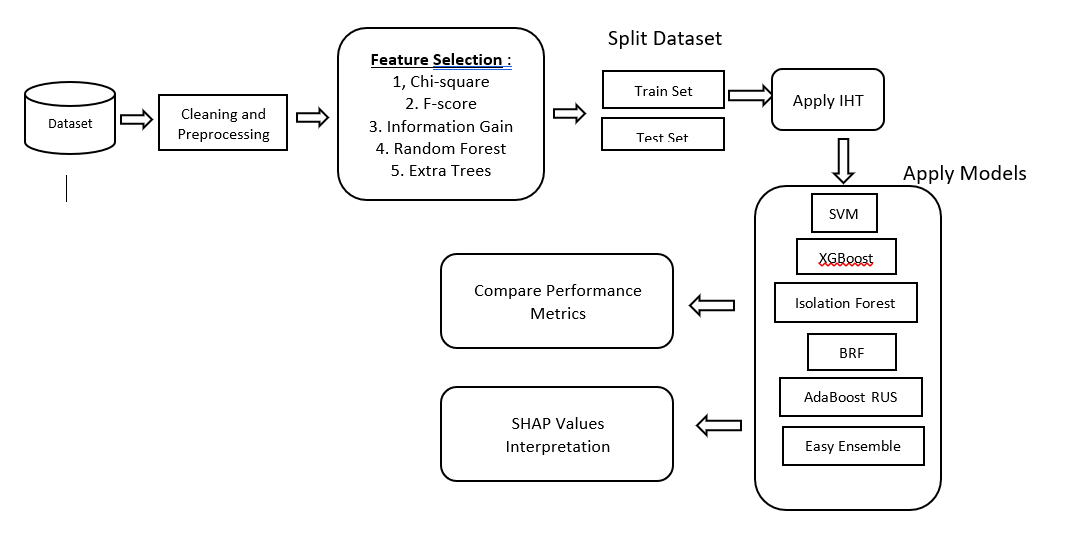

## Install Libraries

In [ ]:
# Install Libraries
!pip install imblearn
# !pip install sweetviz
# !pip install scikit-fuzzy

In [ ]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 33.3 MB/s eta 0:00:00


## Load Libraries

In [7]:
# Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import mutual_info_classif,f_classif,chi2
from sklearn.ensemble import RandomForestClassifier,IsolationForest
from sklearn.metrics import f1_score,classification_report,balanced_accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.svm import SVC

#Suppporting libraries
import time
import joblib
import warnings
warnings.filterwarnings("ignore")

#Imblearn Modules
from imblearn.ensemble import BalancedRandomForestClassifier,RUSBoostClassifier,EasyEnsembleClassifier

# Fuzzy library
#import skfuzzy as fuzz

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Dataset Attributes
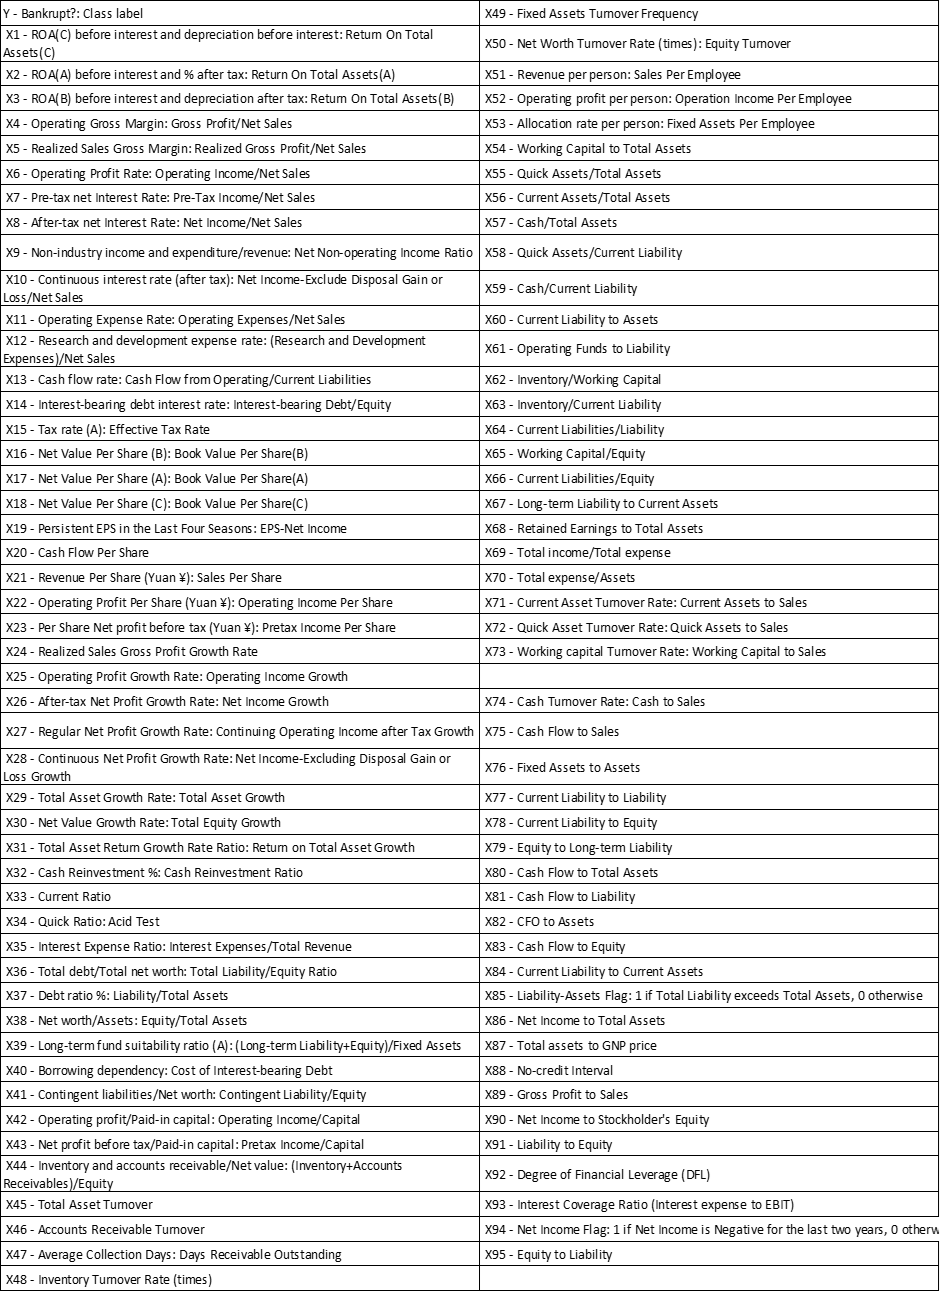

In [8]:
#Load Data
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATA/taiwan_bank.csv")
data.describe(include='all')

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

## EDA

**Observations**

1. No missing values in any column
2. In the EDA report generated by sweetViz, we see the target class of bankrupt companies is only 3% of total dataset. Thus, highly imbalanced
3. We observe correlation among features are less at max around 0.5 .
4. There are 2 categorical features in dataset - "Net Income Flag, Liability-Assets Flag"
5. The Net Income Flag has only one value so it can be discarded.


In [14]:

X = data.drop(columns=["Bankrupt?"," Net Income Flag"],axis=1) #dropping net income flag as it has constant value
Y = data['Bankrupt?']

In [ ]:
## Checking if any column has missing values
data.columns[data.isna().sum()!=0]

Index([], dtype='object')

In [ ]:
# EDA
import sweetviz
my_report  = sweetviz.analyze([data,'Train'], target_feat='Bankrupt?')
my_report.show_html('FinalReport.html')

                                             |          | [  0%]   00:00 -> (? left)

Report FinalReport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## TSNE

We plot a low 2- dimensional view of our high dimensional dataset based on target labels in order ot understand the distribution of labels.

As we can observe from the plots of TSNE that the bankrupt classes are scattered all over the space without forming any distinct cluster. Perhaps due to squeezing of high dimensional data in such small space a clear conclusion cannot be drawn at this point .

In [ ]:
from sklearn.manifold import TSNE
import time
import matplotlib.pyplot as plt
import seaborn as sns



X = data.drop(columns="Bankrupt?",axis=1)

np.random.seed(120);
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=1000, n_iter=1000)
tsne_results = tsne.fit_transform(X)


print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

df_subset = pd.DataFrame();
df_subset['tsne-2d-one'] = tsne_results[:,0];
df_subset['tsne-2d-two'] = tsne_results[:,1];
df_subset['target'] = data['Bankrupt?'];


<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

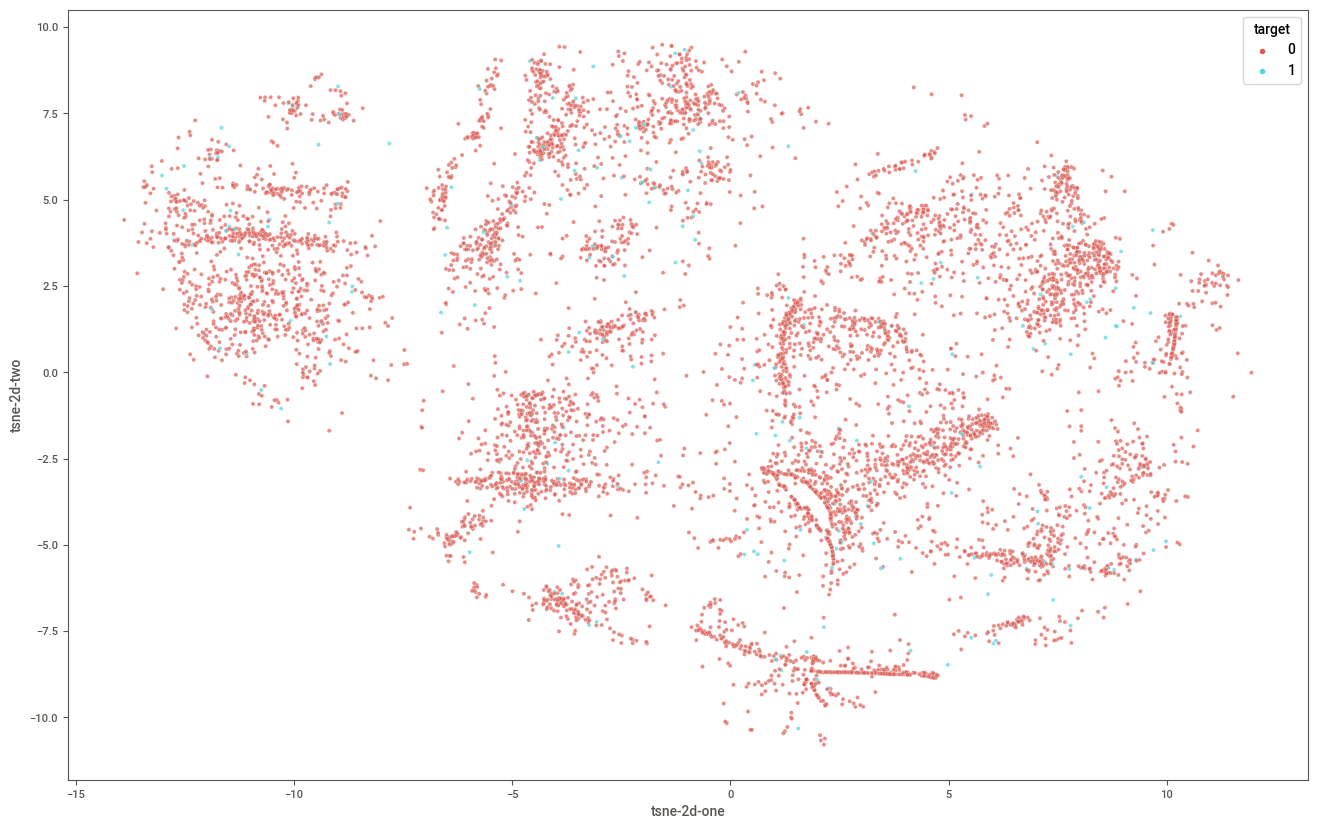

In [ ]:

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.7
)

## Feature Selection

**FILTER METHODS**
1.   Mutual Information (Similar to information Gain)
2.   F-score
3.   Chi- Square

**WRAPPER METHODS**



1.   Random FOrest Classifier
2.   Extra Trees Classifier






### Mutual Information

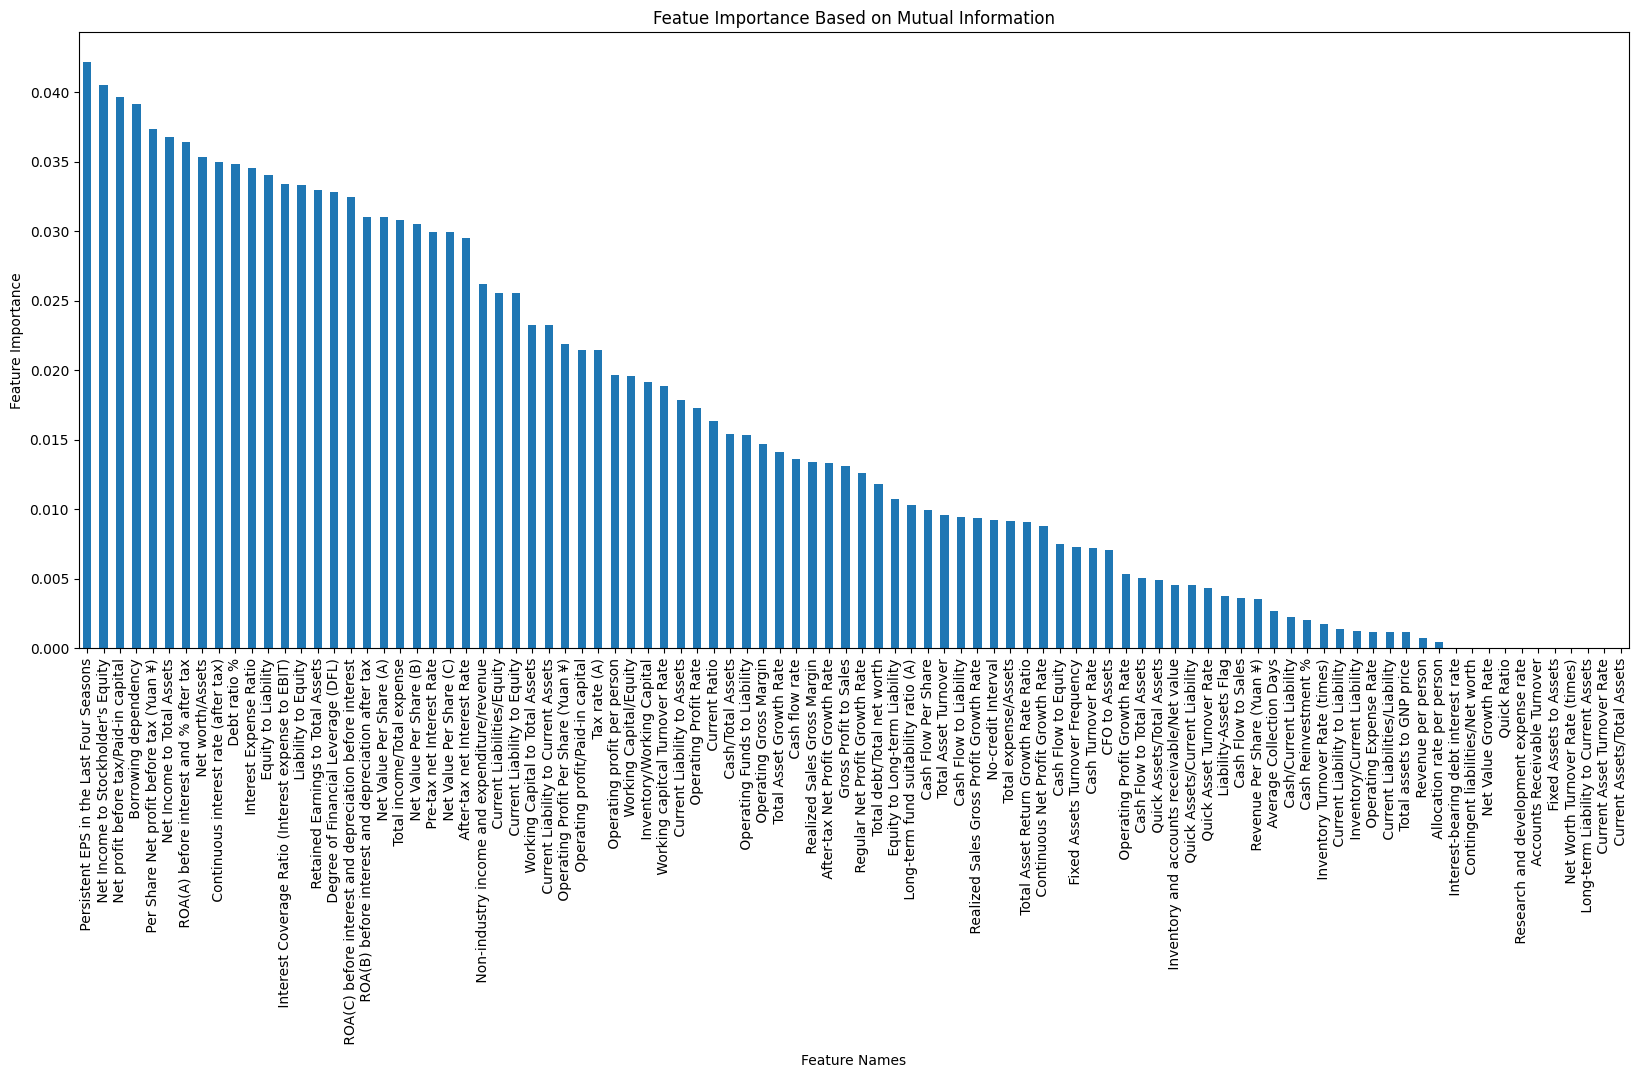

In [ ]:

feature_imp = mutual_info_classif(X,Y)
mutual_info = pd.Series(feature_imp)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)
ax=mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))
ax.set_xlabel("Feature Names")
ax.set_ylabel("Feature Importance")
ax.set_title("Featue Importance Based on Mutual Information")
plt.show()

In [ ]:
#a = pd.Series(mutual_info>0.01,name='mutual_Info')
fs_mi = mutual_info>0.01
sum(fs_mi.rename('Mutual_info',inplace=True))

51

### F-Score


In [ ]:

feature_imp = f_classif(X,Y)
f_score_imp = pd.Series(feature_imp[0])
f_score_imp.index = X.columns
p_val = pd.Series(feature_imp[1])
p_val.index = X.columns

f_score_df = pd.DataFrame([f_score_imp,p_val],index=["f-score","p-value"])
f_score_df = f_score_df.transpose()
f_score_df.sort_values(by=["f-score"],ascending=False)

f-score        p-value
 Net Income to Total Assets                         753.348894  2.098102e-157
 ROA(A) before interest and % after tax             593.228629  1.033741e-125
 ROA(B) before interest and depreciation after tax  549.202093  7.094590e-117
 ROA(C) before interest and depreciation before...  497.535121  1.950813e-106
 Net worth/Assets                                   455.091151   8.373953e-98
...                                                        ...            ...
 Inventory/Current Liability                          0.004607   9.458861e-01
 Long-term Liability to Current Assets                0.004130   9.487602e-01
 Cash Flow to Sales                                   0.001562   9.684706e-01
 Realized Sales Gross Profit Growth Rate              0.001432   9.698112e-01
 Operating Profit Rate                                0.000360   9.848617e-01

[94 rows x 2 columns]

In [ ]:
#Save F-Scores to excel
f_score_df.to_excel('FS_Fscore.xlsx',index=True)

In [ ]:
fs_fscore = f_score_imp>10
sum(fs_fscore.rename('f-score',inplace=True))

53

### Chi Square Value

We can apply chi-square only for positive values of features. So we first verify if all features are positive or not.

In [ ]:
print('Number of features having negative values:')
sum(data.describe().iloc[3,:]<0) #checking if any attribute has negative value using
                                  #min row of describe table

Number of features having negative values:


0

In [ ]:
feature_imp = chi2(X,Y)
chi_sq= pd.Series(feature_imp[0])
chi_sq.index = X.columns
p_val = pd.Series(feature_imp[1])
p_val.index = X.columns

chi_sq_df = pd.DataFrame([chi_sq,p_val],index=["chi-square","p-value"])
chi_sq_df = chi_sq_df.transpose()
chi_sq_df.sort_values(by=["chi-square"],ascending=False)

chi-square   p-value
 Cash/Current Liability                   2.901545e+11  0.000000
 Fixed Assets to Assets                   2.495621e+11  0.000000
 Net Value Growth Rate                    2.421293e+11  0.000000
 Fixed Assets Turnover Frequency          2.200229e+11  0.000000
 Revenue per person                       8.633138e+10  0.000000
...                                                ...       ...
 Inventory/Working Capital                9.789442e-06  0.997504
 Realized Sales Gross Profit Growth Rate  9.328172e-06  0.997563
 Working capitcal Turnover Rate           7.718998e-06  0.997783
 Cash Flow to Sales                       2.030631e-07  0.999640
 Operating Profit Rate                    6.102672e-08  0.999803

[94 rows x 2 columns]

In [ ]:
#Save Chi-square  to excel
chi_sq_df.to_excel('Chi-Square.xlsx',index=True)

In [ ]:
fs_chisq = chi_sq>10
sum(fs_chisq.rename('chi-sq',inplace=True))

28

### Tree Based Embedded Methods

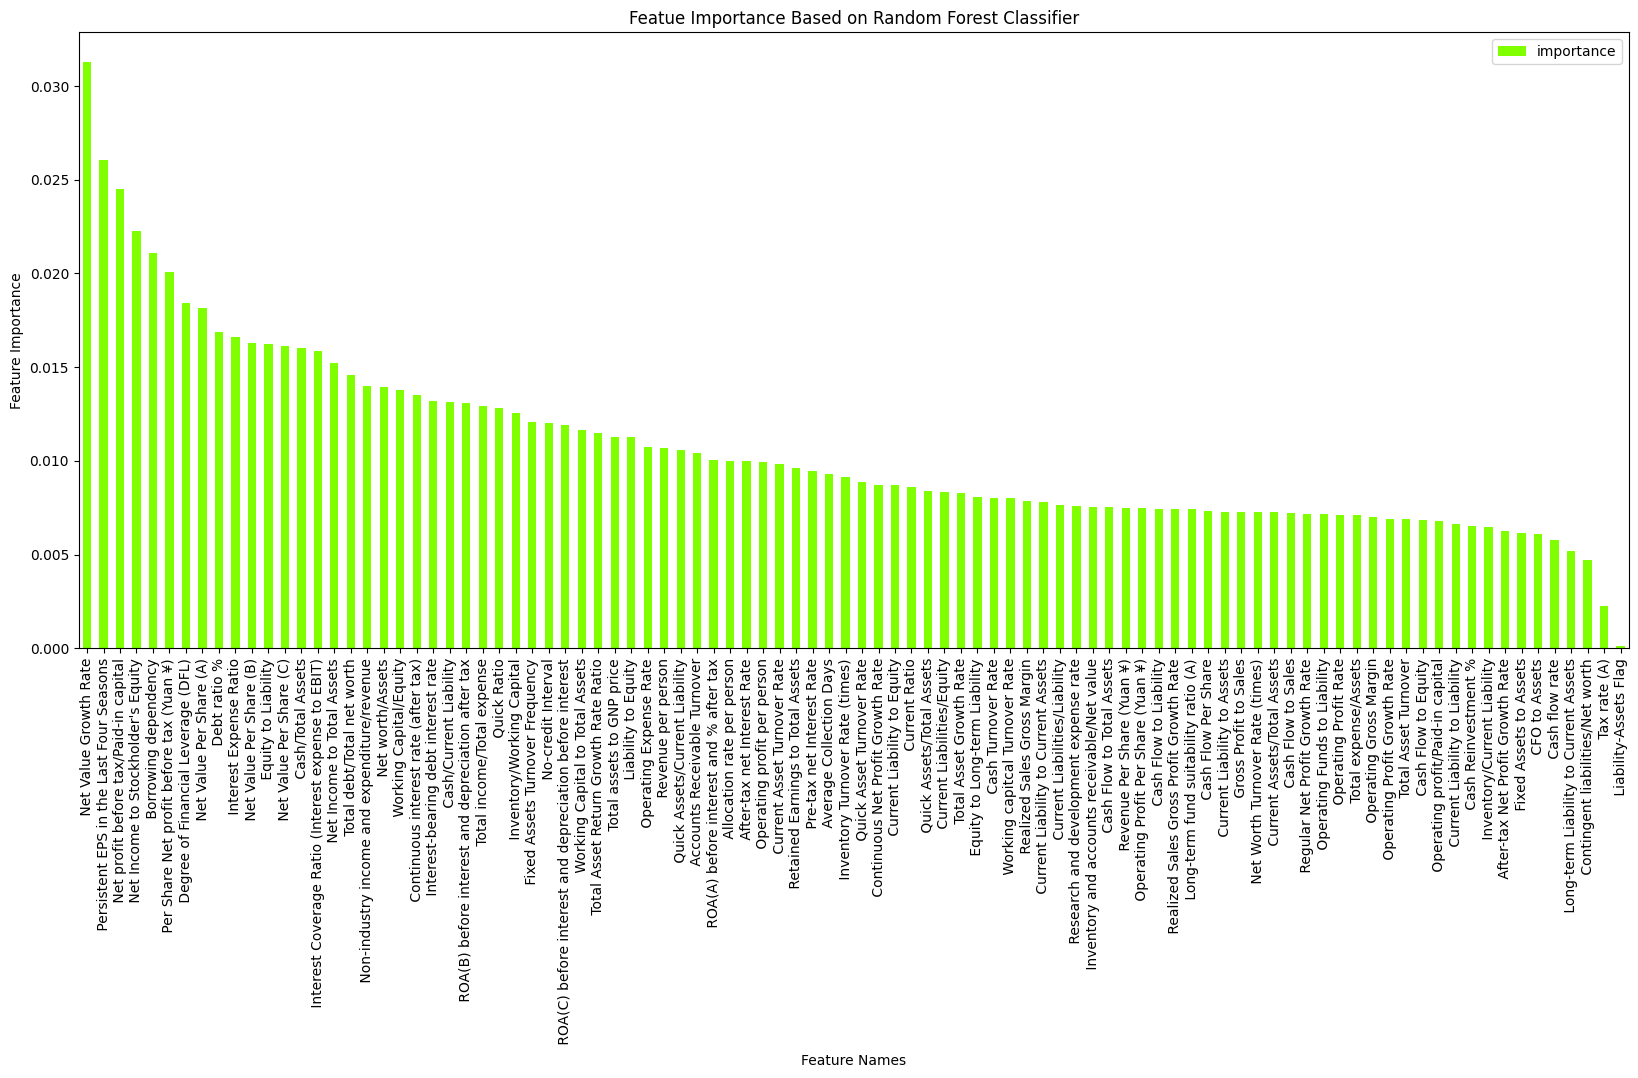

In [ ]:

# Random Forest Classifier
model = RandomForestClassifier(n_estimators=300, random_state=0)
model.fit(X,Y)
feature_importance = model.feature_importances_
feature_imp_df = pd.DataFrame({'feature':X.columns, 'importance':feature_importance})
#Sort the values in descending order
feature_sort_df=feature_imp_df.sort_values("importance", ascending=False)
#Plot Graph
ax = feature_sort_df.plot.bar(x='feature',y='importance',color='chartreuse',figsize=(20, 8))
ax.set_xlabel("Feature Names")
ax.set_ylabel("Feature Importance")
ax.set_title("Featue Importance Based on Random Forest Classifier")
plt.show()

In [ ]:
fs_randForest = pd.Series(feature_importance>0.01,name='Rand_Forest',index=X.columns)
sum(fs_randForest)

40

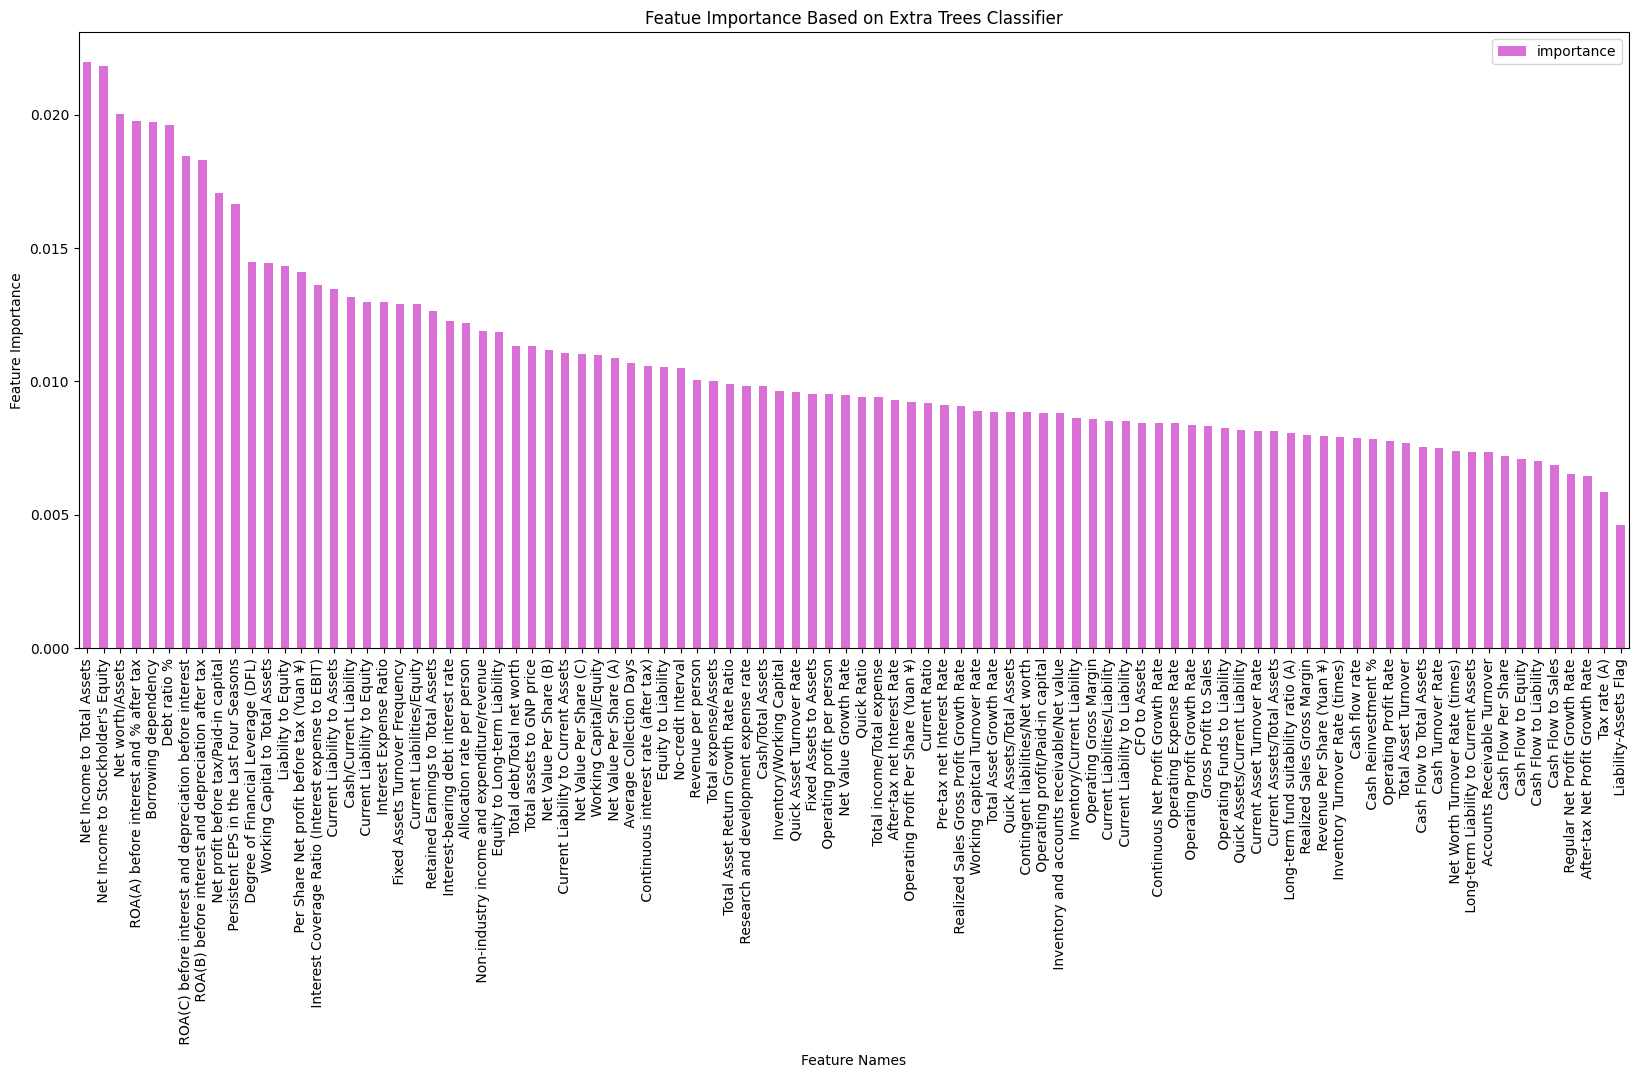

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
# Extra Trees Classifier
model = ExtraTreesClassifier(n_estimators=300, random_state=0)
model.fit(X,Y)
feature_importance = model.feature_importances_
feature_imp_df = pd.DataFrame({'feature':X.columns, 'importance':feature_importance})
#Sort the values in descending order
feature_sort_df=feature_imp_df.sort_values("importance", ascending=False)
#Plot Graph
ax = feature_sort_df.plot.bar(x='feature',y='importance',color='orchid',figsize=(20, 8))
ax.set_xlabel("Feature Names")
ax.set_ylabel("Feature Importance")
ax.set_title("Featue Importance Based on Extra Trees Classifier")
plt.show()


In [ ]:
fs_extraTree = pd.Series(feature_importance>0.01,name='Extra_Tree',index=X.columns)
sum(fs_extraTree)

39

## Selected Features

Listing all features selected from various method in a single dataframe.

If any feature variable is selected by 4 or more feature selection technique then it is added into selected feature subset. The **selection criteria for different techniques was based on how significant that feature is and are listed below**:
1.	Mutual Information Gain > 0.01 (i.e 1%)
2.	F-score > 10 (where p-values are less than 0.05)
3.	Chi-Square >10
4.	Random Forest Classifier -  Feature Importance > 0.01 (i.e 1%)
5.	Extra Tress Classifier – Feature Importance > 0.01 (i.e 1%)


Total 23 features were selected - And if we cross check these features in EDA HTML report **we can observe most of these features show correlation of greater than 0.2 to the target class** .
* "Net Income to Total Assets" shows highest correlation among selected features of 0.32 to target variable


In [ ]:
feat_select_df =pd.DataFrame([fs_mi,fs_fscore,fs_chisq,fs_randForest,fs_extraTree]).transpose()

In [ ]:
selected_feat=list()
for idx,k in enumerate(feat_select_df.values):
  if(sum(k)>=4):
    selected_feat.append(feat_select_df.index[idx])

x = X[selected_feat]
print('The selected final set of features are:',len(selected_feat))
selected_feat

The selected final set of features are: 23


[' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Total debt/Total net worth',
 ' Debt ratio %',
 ' Net worth/Assets',
 ' Borrowing dependency',
 ' Net profit before tax/Paid-in capital',
 ' Fixed Assets Turnover Frequency',
 ' Revenue per person',
 ' Working Capital to Total Assets',
 ' Cash/Total Assets',
 ' Cash/Current Liability',
 ' Working Capital/Equity',
 ' Net Income to Total Assets',
 " Net Income to Stockholder's Equity",
 ' Liability to Equity',
 ' Equity to Liability']

In [ ]:
x.to_csv('features_23.csv',index=False)

## Load Selected Features

In [11]:
x = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA/features_23.csv')
x=x.iloc[:,1:]
x #selectd features dataset

ROA(C) before interest and depreciation before interest  \
0                                              0.370594          
1                                              0.464291          
2                                              0.426071          
3                                              0.399844          
4                                              0.465022          
...                                                 ...          
6814                                           0.493687          
6815                                           0.475162          
6816                                           0.472725          
6817                                           0.506264          
6818                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Net Value Per Share (B)   Net Value Per Share (A)  \
0                     0.147950                  0.147950   
1                     0.182251                  0.182251   
2                     0.177911                  0.177911   
3                     0.154187                  0.154187   
4                     0.167502                  0.167502   
...                        ...                       ...   
6814                  0.175045                  0.175045   
6815                  0.181324                  0.181324   
6816                  0.269521                  0.269521   
6817                  0.213392                  0.213392   
6818                  0.220766                  0.220766   

       Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                     0.147950                                  0.169141   
1                     0.182251                                  0.208944   
2                     0.193713                                  0.180581   
3                     0.154187                                  0.193722   
4                     0.167502                                  0.212537   
...                        ...                                       ...   
6814                  0.175045                                  0.216602   
6815                  0.181324                                  0.216697   
6816                  0.269521                                  0.210929   
6817                  0.213392                                  0.228326   
6818                  0.220766                                  0.227758   

       Per Share Net profit before tax (Yuan ¥)   Total debt/Total net worth  \
0                                      0.138736                     0.021266   
1                                      0.169918                     0.012502   
2                             

## Split Dataset - Train Test



In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(x,Y,stratify=Y,train_size=0.7)

In [16]:
Y_test.value_counts()  # we can see the labels are divided in proportion as we stratified

0    1980
1      66
Name: Bankrupt?, dtype: int64

## Model



### Custom Functions

In [10]:
#custom functions for various models and prediction generation

def svm_func(X, Y):
  svm = SVC(C=0.6, kernel='rbf',gamma='auto', class_weight='balanced')
  svm.fit(X,Y)
  return svm

def xgboost( X,Y, name):
  # Number of trees
  n_estimators = [50,80,100,250]
  # Maximum depth of trees
  max_depth = [4,6,8,12]
  # Minimum number of samples required to split a node
  min_samples_split = [50,100,150]
  # Minimum number of samples required at each leaf node
  min_samples_leaf = [40,50]
  # HYperparameter Grid
  param_dict = {'n_estimators' : n_estimators,
                'max_depth' : max_depth,
                'min_samples_split' : min_samples_split,
                'min_samples_leaf' : min_samples_leaf}
  clf_xgb = XGBClassifier(scale_pos_weight=102)

  # random search
  xg_grid = RandomizedSearchCV(clf_xgb,param_dict,cv = 5, verbose=1, scoring='roc_auc')
  training_start = time.perf_counter()
  xg_grid.fit(X,Y)
  training_end = time.perf_counter()
  xgb_optimal_model = xg_grid.best_estimator_
  print("Best Parameters:",xg_grid.best_params_)
  xgb_train_time = training_end-training_start
  print("Time consumed for training: %4.3f" % (xgb_train_time))

  #save model
  save_model(xgb_optimal_model, name)
  return xgb_optimal_model

def iso_forest( X,Y):
  model=IsolationForest(n_estimators=300,max_samples='auto',contamination=float(0.05),random_state=0)
  model.fit(X)
  return model

def brf(X,Y, name):
  #Findind Best hyper parameters and implementing Balanced
  # Number of trees
  n_estimators = [200,250,300,350]
  # Maximum depth of trees
  max_depth = [4,6,8,10]
  # Minimum number of samples required to split a node
  min_samples_split = [50,100,150]
  # Minimum number of samples required at each leaf node
  min_samples_leaf = [2,10,20]
  # HYperparameter Grid
  param_dict = {'n_estimators' : n_estimators,
                'max_depth' : max_depth,
                'min_samples_split' : min_samples_split,
                'min_samples_leaf' : min_samples_leaf}
  brf_model = BalancedRandomForestClassifier(class_weight='balanced',
                                            sampling_strategy='majority',random_state=0,replacement=True)

  # Grid search
  rf_grid = GridSearchCV(estimator=brf_model,
                        param_grid = param_dict,
                        cv = 5, verbose=1, scoring=('f1'))

  rf_grid.fit(X,Y)
  print("Best Parameters : ", rf_grid.best_params_)
  model = rf_grid.best_estimator_
  #save model
  save_model(model, name)
  return model

def abc(X,Y,name):
  # Number of trees
  n_estimators = [250,300,350]
  # Minimum number of samples required to split a node
  learning_rate = [0.05,0.1,0.5,0.8,1]
  # HYperparameter Grid
  param_dict = {'n_estimators' : n_estimators,
                'learning_rate' : learning_rate}
  rus_model = RUSBoostClassifier(sampling_strategy='majority',random_state=0,replacement=True)
  # Grid search
  rf_grid = GridSearchCV(estimator=rus_model,
                        param_grid = param_dict,
                        cv = 5, verbose=1, scoring=('f1'))

  rf_grid.fit(X,Y)
  model = rf_grid.best_estimator_
  print("Best Parameters : ", rf_grid.best_params_)
  #save model
  save_model(model, name)
  return model


def een(X,Y,name):
  # Number of trees
  n_estimators = [200,250,300,350]
  # HYperparameter Grid
  param_dict = {'n_estimators' : n_estimators}
  een_model = EasyEnsembleClassifier(sampling_strategy='majority',random_state=0,replacement=True)
  # Grid search
  rf_grid = GridSearchCV(estimator=een_model,
                        param_grid = param_dict,
                        cv = 5, verbose=2, scoring=('f1'))

  rf_grid.fit(X,Y)
  model = rf_grid.best_estimator_
  print("Best Parameters : ", rf_grid.best_params_)
  #save model
  save_model(model, name)
  return model

def gen_predict(model, X, Y, type, name):
  preds = model.predict(X)
  if(name=='Iso_Forest'):
    X_copy = X.copy()
    X_copy['anomaly_score'] =  preds
    preds = X_copy['anomaly_score'].map({1:0,-1:1})
  print(f"{type} - dataset predictions:")
  print(classification_report(Y,preds,target_names=['Non-Bankrupt','Bankrupt']))
  print(f"Balanced Accuracy of {type} : ", balanced_accuracy_score(Y,preds))

  #Prepare dataframe
  report_df = pd.DataFrame()
  report = classification_report(Y,preds,target_names=['Non-Bankrupt','Bankrupt'], output_dict=True)
  report_dict = {"accuracy": report['accuracy'], "balanced_accuracy": balanced_accuracy_score(Y,preds),
                 "precision_Non-Bankrupt": report['Non-Bankrupt']['precision'],
               "recall_Non-Bankrupt": report['Non-Bankrupt']['recall'], "f1score_Non-Bankrupt": report['Non-Bankrupt']['f1-score'],
               "precision_Bankrupt": report['Bankrupt']['precision'],"recall_Bankrupt": report['Bankrupt']['recall'], "f1score_Bankrupt": report['Bankrupt']['f1-score'],
               "precision_macro-avg": report['macro avg']['precision'],"precision_weight-avg": report['weighted avg']['precision'],
               "recall_macro-avg": report['macro avg']['recall'],"recall_weight-avg": report['weighted avg']['recall'],
               "f1score_macro-avg": report['macro avg']['f1-score'],"f1score_weight-avg": report['weighted avg']['f1-score']}

  report_df[name] = report_dict
  return report_df

#Save the model
def save_model(model, name):
  joblib.dump(model, f'/content/drive/MyDrive/Colab Notebooks/DATA/{name}.joblib')
  print("classifier model saved : ", name)

#Load Model
def load_model(name):
  model = joblib.load(f'/content/drive/MyDrive/Colab Notebooks/DATA/{name}.joblib')
  return model


In [ ]:
#Intialise
metrics_df = pd.DataFrame()

### SVM

In [ ]:
#call svm
model = svm_func(X_train,Y_train)
report_df = gen_predict(model,X_train,Y_train,"Train","SVM")
metrics_df= report_df

#test predictions
report_df = gen_predict(model,X_test,Y_test,"Test","SVM_Test")
metrics_df= pd.concat([metrics_df,report_df],axis=1)

Train - dataset predictions:
              precision    recall  f1-score   support

Non-Bankrupt       0.99      0.90      0.94      4619
    Bankrupt       0.21      0.78      0.33       154

    accuracy                           0.90      4773
   macro avg       0.60      0.84      0.64      4773
weighted avg       0.97      0.90      0.92      4773

Balanced Accuracy of Train :  0.8400325589111041
Test - dataset predictions:
              precision    recall  f1-score   support

Non-Bankrupt       0.98      0.89      0.93      1980
    Bankrupt       0.13      0.50      0.21        66

    accuracy                           0.88      2046
   macro avg       0.56      0.70      0.57      2046
weighted avg       0.95      0.88      0.91      2046

Balanced Accuracy of Test :  0.6962121212121213


In [ ]:
svm_df = metrics_df
svm_df.to_excel('metrics.xlsx')

### XGBoost

In [ ]:
#call xgboost
model = xgboost(X_train,Y_train, "xgboost")
#model = load_model("xgboost")
report_df = gen_predict(model,X_train,Y_train,"Train","Xgboost")
metrics_df= pd.concat([metrics_df,report_df],axis=1)

#test predictions
report_df = gen_predict(model,X_test,Y_test,"Test","Xgboost_Test")
metrics_df= pd.concat([metrics_df,report_df],axis=1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[17:41:17] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[17:41:26] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[17:41:28] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[17:41:30] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[17:41:32] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[17:41:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[17:41:38] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[17:41:39] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[17:41:40] WARNING:

### Isolation Forest

In [ ]:
#call Isolation forest
model = iso_forest(X_train,Y_train)
report_df = gen_predict(model,X_train,Y_train,"Train","Iso_Forest")
metrics_df= pd.concat([metrics_df,report_df],axis=1)

#test predictions
report_df = gen_predict(model,X_test,Y_test,"Test","Iso_Forest")
metrics_df= pd.concat([metrics_df,report_df],axis=1)
#IF_X_train['scores'] = model.decision_function(X_train)

Train - dataset predictions:
              precision    recall  f1-score   support

Non-Bankrupt       0.98      0.96      0.97      4619
    Bankrupt       0.20      0.31      0.24       154

    accuracy                           0.94      4773
   macro avg       0.59      0.64      0.61      4773
weighted avg       0.95      0.94      0.94      4773

Balanced Accuracy of Train :  0.6351686849630127
Test - dataset predictions:
              precision    recall  f1-score   support

Non-Bankrupt       0.98      0.95      0.96      1980
    Bankrupt       0.19      0.33      0.24        66

    accuracy                           0.93      2046
   macro avg       0.58      0.64      0.60      2046
weighted avg       0.95      0.93      0.94      2046

Balanced Accuracy of Test :  0.6431818181818182


### Balanced Random Forest Classifier

In [ ]:
#call Balanced Random  forest Classifier
#model = brf(X_train,Y_train, "brf")
model = load_model("brf")
report_df = gen_predict(model,X_train,Y_train,"Train","Balanced_Random_Forest")
metrics_df= pd.concat([metrics_df,report_df],axis=1)

#test predictions
report_df = gen_predict(model,X_test,Y_test,"Test","Balanced_Random_Forest_test")
metrics_df= pd.concat([metrics_df,report_df],axis=1)

Train - dataset predictions:
              precision    recall  f1-score   support

Non-Bankrupt       1.00      0.46      0.63      4619
    Bankrupt       0.06      1.00      0.11       154

    accuracy                           0.47      4773
   macro avg       0.53      0.73      0.37      4773
weighted avg       0.97      0.47      0.61      4773

Balanced Accuracy of Train :  0.7285126650790215
Test - dataset predictions:
              precision    recall  f1-score   support

Non-Bankrupt       1.00      0.47      0.63      1980
    Bankrupt       0.06      0.98      0.11        66

    accuracy                           0.48      2046
   macro avg       0.53      0.72      0.37      2046
weighted avg       0.97      0.48      0.62      2046

Balanced Accuracy of Test :  0.725


### AdaBoost Classifier with Undersampling



In [ ]:
#call AdaboostClassifier
#model = abc(X_train,Y_train, "rus")
model = load_model("rus_model")
report_df = gen_predict(model,X_train,Y_train,"Train","AdaBoost-RUS")
metrics_df= pd.concat([metrics_df,report_df],axis=1)

#test predictions
report_df = gen_predict(model,X_test,Y_test,"Test","AdaBoost-RUS_test")
metrics_df= pd.concat([metrics_df,report_df],axis=1)

Train - dataset predictions:
              precision    recall  f1-score   support

Non-Bankrupt       0.99      0.95      0.97      4619
    Bankrupt       0.31      0.70      0.43       154

    accuracy                           0.94      4773
   macro avg       0.65      0.82      0.70      4773
weighted avg       0.97      0.94      0.95      4773

Balanced Accuracy of Train :  0.8245614528359712
Test - dataset predictions:
              precision    recall  f1-score   support

Non-Bankrupt       0.99      0.95      0.97      1980
    Bankrupt       0.34      0.71      0.46        66

    accuracy                           0.95      2046
   macro avg       0.67      0.83      0.72      2046
weighted avg       0.97      0.95      0.96      2046

Balanced Accuracy of Test :  0.8330808080808081


In [ ]:
# import warnings
# warnings.filterwarnings("ignore")
# #Findind Best hyper parameters and implementing Balanced
# # Number of trees
# n_estimators = [250,300,350]
# # Minimum number of samples required to split a node
# learning_rate = [0.05,0.1,0.5,0.8,1]
# # HYperparameter Grid
# param_dict = {'n_estimators' : n_estimators,
#               'learning_rate' : learning_rate}
# rus_model = RUSBoostClassifier(sampling_strategy='majority',random_state=0,replacement=True)

# # Grid search
# rf_grid = GridSearchCV(estimator=rus_model,
#                       param_grid = param_dict,
#                       cv = 5, verbose=2, scoring=('f1'))

# rf_grid.fit(X_train,Y_train)

# model = rf_g\\drive\\1R0VvsJ7GuAloTsK5FurgzZ-faB3oEIOTrid.best_estimator_

### Easy Ensemble - AdaBoosted trees with Balanced Samples

In [ ]:
#call AdaboostClassifier
#model = abc(X_train,Y_train, "rus")
model = load_model("een_model")
report_df = gen_predict(model,X_train,Y_train,"Train","Easy_Ensemble")
metrics_df= pd.concat([metrics_df,report_df],axis=1)

#test predictions
report_df = gen_predict(model,X_test,Y_test,"Test","Easy_Ensemble_test")
metrics_df= pd.concat([metrics_df,report_df],axis=1)

Train - dataset predictions:
              precision    recall  f1-score   support

Non-Bankrupt       1.00      0.84      0.91      4619
    Bankrupt       0.16      0.97      0.28       154

    accuracy                           0.84      4773
   macro avg       0.58      0.90      0.59      4773
weighted avg       0.97      0.84      0.89      4773

Balanced Accuracy of Train :  0.9013890958575956
Test - dataset predictions:
              precision    recall  f1-score   support

Non-Bankrupt       1.00      0.84      0.91      1980
    Bankrupt       0.17      0.97      0.28        66

    accuracy                           0.84      2046
   macro avg       0.58      0.90      0.60      2046
weighted avg       0.97      0.84      0.89      2046

Balanced Accuracy of Test :  0.9037878787878788


## IHT

In [ ]:
from imblearn.under_sampling import InstanceHardnessThreshold

loaded_rus = load_model("rus_model")
iht = InstanceHardnessThreshold(estimator=loaded_rus, sampling_strategy=0.05, random_state=100)
X_train_res, Y_train_res = iht.fit_resample(X_train, Y_train)


In [ ]:
X_train_res.shape

(3234, 23)

### SVM

In [ ]:
#call svm
model = svm_func(X_train_res,Y_train_res)
report_df = gen_predict(model,X_train,Y_train,"Train","SVM")
metrics_df= report_df

#test predictions
report_df = gen_predict(model,X_test,Y_test,"Test","SVM_Test")
metrics_df= pd.concat([metrics_df,report_df],axis=1)

Train - dataset predictions:
              precision    recall  f1-score   support

Non-Bankrupt       1.00      0.88      0.94      4619
    Bankrupt       0.20      0.87      0.32       154

    accuracy                           0.88      4773
   macro avg       0.60      0.88      0.63      4773
weighted avg       0.97      0.88      0.92      4773

Balanced Accuracy of Train :  0.8767189727354265
Test - dataset predictions:
              precision    recall  f1-score   support

Non-Bankrupt       0.98      0.89      0.93      1980
    Bankrupt       0.13      0.48      0.20        66

    accuracy                           0.87      2046
   macro avg       0.55      0.69      0.57      2046
weighted avg       0.95      0.87      0.91      2046

Balanced Accuracy of Test :  0.6863636363636364


In [ ]:
metrics_df

SVM  SVM_Test
accuracy                0.882883  0.874878
balanced_accuracy       0.876719  0.686364
precision_Non-Bankrupt  0.995122  0.981027
recall_Non-Bankrupt     0.883308  0.887879
f1score_Non-Bankrupt    0.935887  0.932131
precision_Bankrupt      0.199108  0.125984
recall_Bankrupt         0.870130  0.484848
f1score_Bankrupt        0.324063  0.200000
precision_macro-avg     0.597115  0.553506
precision_weight-avg    0.969439  0.953445
recall_macro-avg        0.876719  0.686364
recall_weight-avg       0.882883  0.874878
f1score_macro-avg       0.629975  0.566066
f1score_weight-avg      0.916147  0.908514

### XGBoost

In [ ]:
#call xgboost
model = xgboost(X_train_res,Y_train_res, "xgboost")
#model = load_model("xgboost")
report_df = gen_predict(model,X_train,Y_train,"Train","Xgboost")
metrics_df= pd.concat([metrics_df,report_df],axis=1)

#test predictions
report_df = gen_predict(model,X_test,Y_test,"Test","Xgboost_Test")
metrics_df= pd.concat([metrics_df,report_df],axis=1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[15:20:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[15:20:05] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[15:20:05] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[15:20:06] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[15:20:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[15:20:10] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[15:20:10] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[15:20:11] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[15:20:11] WARNING:

### Isolation Forest

In [ ]:
#call Isolation forest
model = iso_forest(X_train_res,Y_train_res)
report_df = gen_predict(model,X_train,Y_train,"Train","Iso_Forest")
metrics_df= pd.concat([metrics_df,report_df],axis=1)

#test predictions
report_df = gen_predict(model,X_test,Y_test,"Test","Iso_Forest")
metrics_df= pd.concat([metrics_df,report_df],axis=1)
#IF_X_train['scores'] = model.decision_function(X_train)

Train - dataset predictions:
              precision    recall  f1-score   support

Non-Bankrupt       0.98      0.95      0.97      4619
    Bankrupt       0.26      0.48      0.33       154

    accuracy                           0.94      4773
   macro avg       0.62      0.72      0.65      4773
weighted avg       0.96      0.94      0.95      4773

Balanced Accuracy of Train :  0.7169863044511237
Test - dataset predictions:
              precision    recall  f1-score   support

Non-Bankrupt       0.98      0.96      0.97      1980
    Bankrupt       0.29      0.44      0.35        66

    accuracy                           0.95      2046
   macro avg       0.63      0.70      0.66      2046
weighted avg       0.96      0.95      0.95      2046

Balanced Accuracy of Test :  0.7015151515151515


In [ ]:
metrics_df.to_excel("metricsIht.xlsx")

### BRF

In [ ]:
#call Balanced Random  forest Classifier
model = brf(X_train_res,Y_train_res, "brf_iht")
#model = load_model("brf")
report_df = gen_predict(model,X_train,Y_train,"Train","Balanced_Random_Forest")
metrics_df= pd.concat([metrics_df,report_df],axis=1)

#test predictions
report_df = gen_predict(model,X_test,Y_test,"Test","Balanced_Random_Forest_test")
metrics_df= pd.concat([metrics_df,report_df],axis=1)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters :  {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 50, 'n_estimators': 300}
classifier model saved :  brf_iht
Train - dataset predictions:
              precision    recall  f1-score   support

Non-Bankrupt       1.00      0.50      0.67      4619
    Bankrupt       0.06      1.00      0.12       154

    accuracy                           0.51      4773
   macro avg       0.53      0.75      0.39      4773
weighted avg       0.97      0.51      0.65      4773

Balanced Accuracy of Train :  0.749404633037454
Test - dataset predictions:
              precision    recall  f1-score   support

Non-Bankrupt       1.00      0.48      0.64      1980
    Bankrupt       0.06      0.98      0.11        66

    accuracy                           0.49      2046
   macro avg       0.53      0.73      0.38      2046
weighted avg       0.97      0.49      0.63      2046

Balanced Accuracy of Test :  0.73005050

### ABC

In [ ]:
#call AdaboostClassifier
model = abc(X_train_res,Y_train_res, "rus_IHT")
#model = load_model("rus_model")
report_df = gen_predict(model,X_train,Y_train,"Train","AdaBoost-RUS")
metrics_df= pd.concat([metrics_df,report_df],axis=1)

#test predictions
report_df = gen_predict(model,X_test,Y_test,"Test","AdaBoost-RUS_test")
metrics_df= pd.concat([metrics_df,report_df],axis=1)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Parameters :  {'learning_rate': 0.1, 'n_estimators': 350}
classifier model saved :  rus_IHT
Train - dataset predictions:
              precision    recall  f1-score   support

Non-Bankrupt       1.00      0.80      0.89      4619
    Bankrupt       0.14      1.00      0.25       154

    accuracy                           0.80      4773
   macro avg       0.57      0.90      0.57      4773
weighted avg       0.97      0.80      0.87      4773

Balanced Accuracy of Train :  0.8978133795193766
Test - dataset predictions:
              precision    recall  f1-score   support

Non-Bankrupt       0.99      0.80      0.88      1980
    Bankrupt       0.13      0.88      0.22        66

    accuracy                           0.80      2046
   macro avg       0.56      0.84      0.55      2046
weighted avg       0.97      0.80      0.86      2046

Balanced Accuracy of Test :  0.8373737373737373


In [ ]:
metrics_df

SVM  SVM_Test   Xgboost  Xgboost_Test  \
accuracy                0.882883  0.874878  0.839514      0.828935   
balanced_accuracy       0.876719  0.686364  0.917082      0.853030   
precision_Non-Bankrupt  0.995122  0.981027  1.000000      0.995140   
recall_Non-Bankrupt     0.883308  0.887879  0.834163      0.827273   
f1score_Non-Bankrupt    0.935887  0.932131  0.909585      0.903475   
precision_Bankrupt      0.199108  0.125984  0.167391      0.145000   
recall_Bankrupt         0.870130  0.484848  1.000000      0.878788   
f1score_Bankrupt        0.324063  0.200000  0.286778      0.248927   
precision_macro-avg     0.597115  0.553506  0.583696      0.570070   
precision_weight-avg    0.969439  0.953445  0.973136      0.967716   
recall_macro-avg        0.876719  0.686364  0.917082      0.853030   
recall_weight-avg       0.882883  0.874878  0.839514      0.828935   
f1score_macro-avg       0.629975  0.566066  0.598181      0.576201   
f1score_weight-avg      0.916147  0.908514  0.889490      0.882360   

                        Balanced_Random_Forest  Balanced_Random_Forest_test  \
accuracy                              0.514980                     0.491691   
balanced_accuracy                     0.749405                     0.730051   
precision_Non-Bankrupt                1.000000                     0.998938   
recall_Non-Bankrupt                   0.498809                     0.475253   
f1score_Non-Bankrupt                  0.665607                     0.644079   
precision_Bankrupt                    0.062373                     0.058877   
recall_Bankrupt                       1.000000                     0.984848   
f1score_Bankrupt                      0.117423                     0.111111   
precision_macro-avg                   0.531187                     0.528908   
precision_weight-avg                  0.969748                     0.968614   
recall_macro-avg                      0.749405                     0.730051   
recall_weight-avg                     0.514980                     0.491691   
f1score_macro-avg                     0.391515                     0.377595   
f1score_weight-avg                    0.647920                     0.626887   

                        AdaBoost-RUS  AdaBoost-RUS_test  Easy_Ensemble  \
accuracy                    0.802221           0.798631       0.736853   
balanced_accuracy           0.897813           0.837374       0.864040   
precision_Non-Bankrupt      1.000000           0.994949       1.000000   
recall_Non-Bankrupt         0.795627           0.795960       0.728080   
f1score_Non-Bankrupt        0.886183           0.884400       0.842646   
precision_Bankrupt          0.140255           0.125541       0.109220   
recall_Bankrupt             1.000000           0.878788       1.000000   
f1score_Bankrupt            0.246006           0.219697       0.196931   
precision_macro-avg         0.570128           0.560245       0.554610   
precision_weight-avg        0.972260           0.966904       0.971259   
recall_macro-avg            0.897813           0.837374       0.864040   
recall_weight-avg           0.802221           0.798631       0.736853   
f1score_macro-avg           0.566095           0.552048       0.519788   
f1score_weight-avg          0.865528           0.862958       0.821812   

                        Easy_Ensemble_test  Iso_Forest  Iso_Forest  
accuracy                          0.733138    0.938194    0.946725  
balanced_accuracy                 0.825505    0.716986    0.701515  
precision_Non-Bankrupt            0.996537    0.982159    0.980977  
recall_Non-Bankrupt               0.726768    0.953453    0.963636  
f1score_Non-Bankrupt              0.840537    0.967593    0.972229  
precision_Bankrupt                0.101329    0.256055    0.287129  
recall_Bankrupt                   0.924242    0.480519    0.439394  
f1score_Bankrupt                  0.182635    0.334086    0.347305  
precision_macro-avg               0.548933    0.619107    0.

### EE

In [ ]:
#call AdaboostClassifier
model = een(X_train_res,Y_train_res, "een_iht")
#model = load_model("een_model")
report_df = gen_predict(model,X_train,Y_train,"Train","Easy_Ensemble")
metrics_df= pd.concat([metrics_df,report_df],axis=1)

#test predictions
report_df = gen_predict(model,X_test,Y_test,"Test","Easy_Ensemble_test")
metrics_df= pd.concat([metrics_df,report_df],axis=1)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ...................................n_estimators=200; total time=  39.3s
[CV] END ...................................n_estimators=200; total time=  28.4s
[CV] END ...................................n_estimators=200; total time=  28.8s
[CV] END ...................................n_estimators=200; total time=  29.2s
[CV] END ...................................n_estimators=200; total time=  29.4s
[CV] END ...................................n_estimators=250; total time=  36.3s
[CV] END ...................................n_estimators=250; total time=  35.4s
[CV] END ...................................n_estimators=250; total time=  36.2s
[CV] END ...................................n_estimators=250; total time=  34.6s
[CV] END ...................................n_estimators=250; total time=  36.2s
[CV] END ...................................n_estimators=300; total time=  42.5s
[CV] END ...................................n_est

## Plot Metrics

In [48]:
# Load Metrics Data
report_train_before = pd.read_excel("/content/metrics_report.xlsx", sheet_name="train-before",index_col="METRICS")
report_test_before = pd.read_excel("/content/metrics_report.xlsx", sheet_name="test-before",index_col="METRICS")
# Metrics after applying IHT sampling
report_train_after = pd.read_excel("/content/metrics_report.xlsx", sheet_name="train-after",index_col="METRICS")
report_test_after = pd.read_excel("/content/metrics_report.xlsx", sheet_name="test-after",index_col="METRICS")

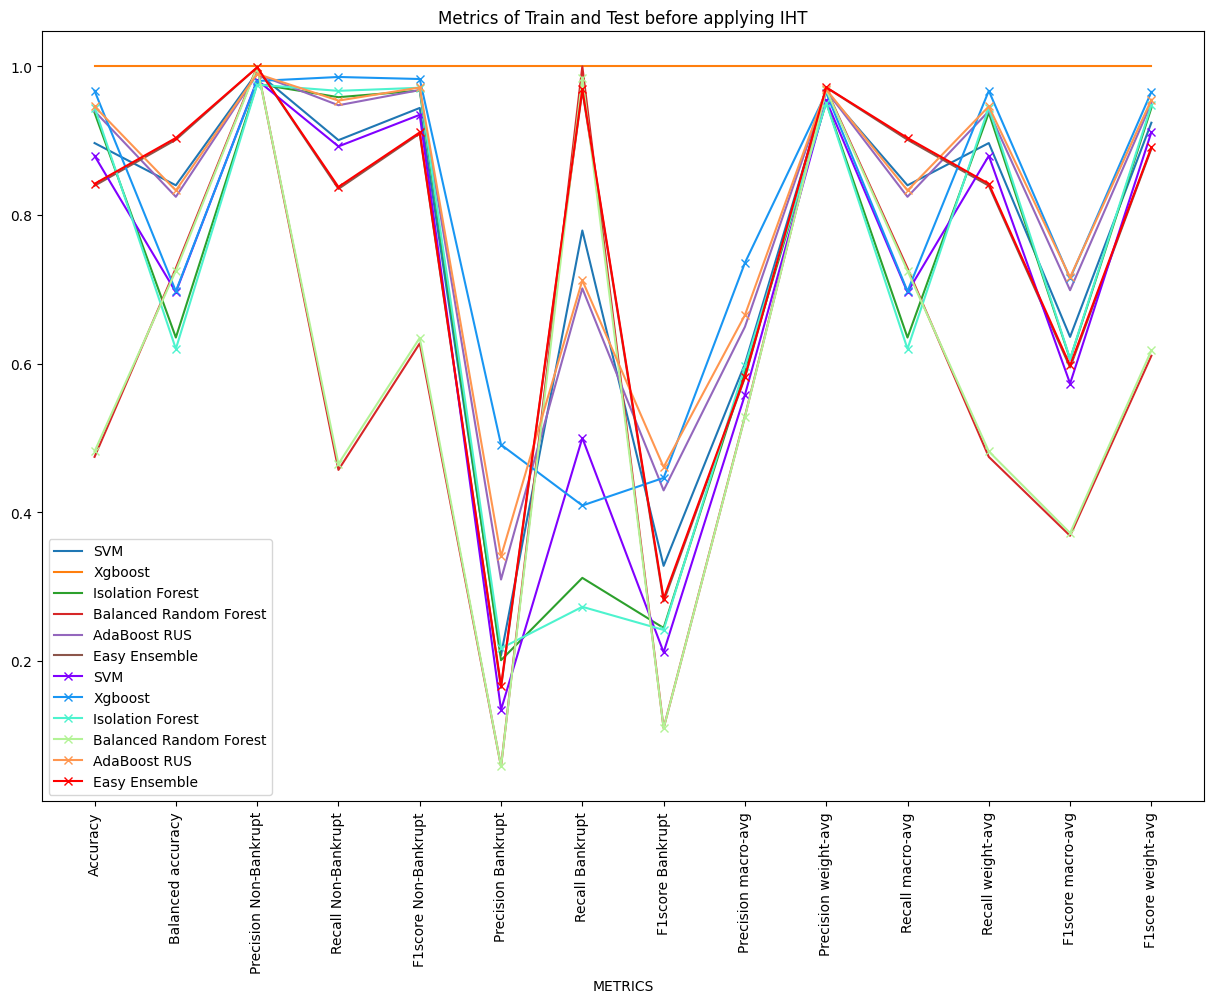

In [44]:
ax = report_train_before.plot(figsize=(15,10),rot=90, xticks=list(range(0,14)))
ax.set_xticklabels(report_train_before.index.tolist())
report_test_before.plot(ax=ax, colormap="rainbow",marker='x',rot=90, xticks=list(range(0,14)))
plt.title("Metrics of Train and Test before applying IHT")
plt.show()

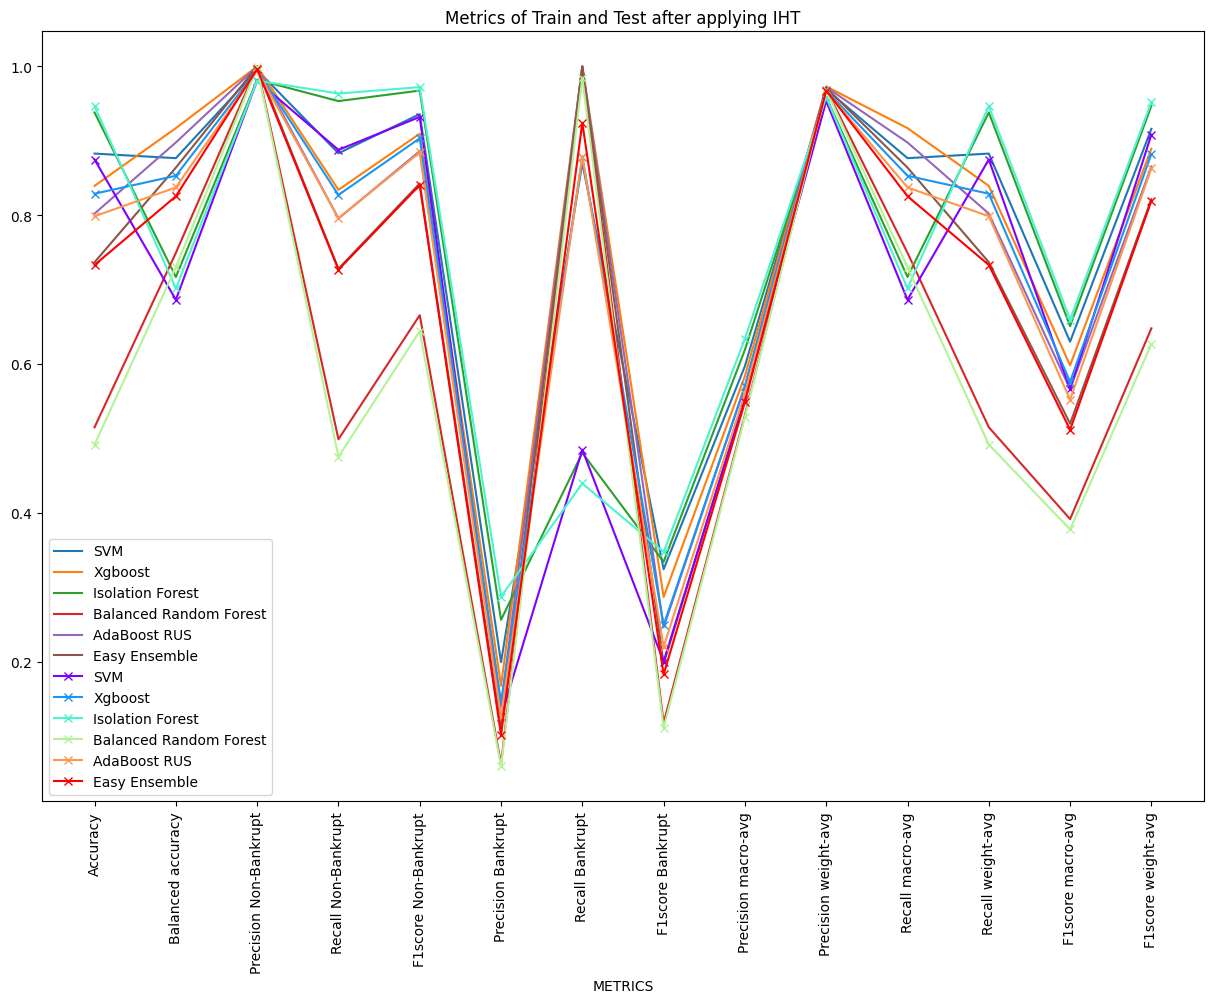

In [49]:
ax = report_train_after.plot(figsize=(15,10),rot=90, xticks=list(range(0,14)))
ax.set_xticklabels(report_train_after.index.tolist())
report_test_after.plot(ax=ax, colormap="rainbow",marker='x',rot=90, xticks=list(range(0,14)))
plt.title("Metrics of Train and Test after applying IHT")
plt.show()

In [46]:
report_test_before

SVM   Xgboost  Isolation Forest  \
METRICS                                                        
Accuracy                0.879765  0.967253          0.944770   
Balanced accuracy       0.696212  0.697475          0.619949   
Precision Non-Bankrupt  0.981667  0.980412          0.975548   
Recall Non-Bankrupt     0.892424  0.985859          0.967172   
F1score Non-Bankrupt    0.934921  0.983128          0.971342   
Precision Bankrupt      0.134146  0.490909          0.216867   
Recall Bankrupt         0.500000  0.409091          0.272727   
F1score Bankrupt        0.211538  0.446281          0.241611   
Precision macro-avg     0.557907  0.735660          0.596208   
Precision weight-avg    0.954327  0.964621          0.951074   
Recall macro-avg        0.696212  0.697475          0.619949   
Recall weight-avg       0.879765  0.967253          0.944770   
F1score macro-avg       0.573230  0.714704          0.606476   
F1score weight-avg      0.911586  0.965810          0.947802   

                        Balanced Random Forest  AdaBoost RUS  Easy Ensemble  
METRICS                                                                      
Accuracy                              0.481916      0.946237       0.842131  
Balanced accuracy                     0.725000      0.833081       0.903788  
Precision Non-Bankrupt                0.998915      0.990042       0.998796  
Recall Non-Bankrupt                   0.465152      0.954040       0.837879  
F1score Non-Bankrupt                  0.634735      0.971708       0.911288  
Precision Bankrupt                    0.057829      0.340580       0.166234  
Recall Bankrupt                       0.984848      0.712121       0.969697  
F1score Bankrupt                      0.109244      0.460784       0.283814  
Precision macro-avg                   0.528372      0.665311       0.582515  
Precision weight-avg                  0.968558      0.969092       0.971939  
Recall macro-avg                      0.725000      0.833081       0.903788  
Recall weight-avg                     0.481916      0.946237       0.842131  
F1score macro-avg                     0.371989      0.716246       0.597551  
F1score weight-avg                    0.617783      0.955226       0.891047

In [50]:
report_test_after

SVM   Xgboost  Isolation Forest  \
METRICS                                                        
Accuracy                0.874878  0.828935          0.946725   
Balanced accuracy       0.686364  0.853030          0.701515   
Precision Non-Bankrupt  0.981027  0.995140          0.980977   
Recall Non-Bankrupt     0.887879  0.827273          0.963636   
F1score Non-Bankrupt    0.932131  0.903475          0.972229   
Precision Bankrupt      0.125984  0.145000          0.287129   
Recall Bankrupt         0.484848  0.878788          0.439394   
F1score Bankrupt        0.200000  0.248927          0.347305   
Precision macro-avg     0.553506  0.570070          0.634053   
Precision weight-avg    0.953445  0.967716          0.958595   
Recall macro-avg        0.686364  0.853030          0.701515   
Recall weight-avg       0.874878  0.828935          0.946725   
F1score macro-avg       0.566066  0.576201          0.659767   
F1score weight-avg      0.908514  0.882360          0.952070   

                        Balanced Random Forest  AdaBoost RUS  Easy Ensemble  
METRICS                                                                      
Accuracy                              0.491691      0.798631       0.733138  
Balanced accuracy                     0.730051      0.837374       0.825505  
Precision Non-Bankrupt                0.998938      0.994949       0.996537  
Recall Non-Bankrupt                   0.475253      0.795960       0.726768  
F1score Non-Bankrupt                  0.644079      0.884400       0.840537  
Precision Bankrupt                    0.058877      0.125541       0.101329  
Recall Bankrupt                       0.984848      0.878788       0.924242  
F1score Bankrupt                      0.111111      0.219697       0.182635  
Precision macro-avg                   0.528908      0.560245       0.548933  
Precision weight-avg                  0.968614      0.966904       0.967660  
Recall macro-avg                      0.730051      0.837374       0.825505  
Recall weight-avg                     0.491691      0.798631       0.733138  
F1score macro-avg                     0.377595      0.552048       0.511586  
F1score weight-avg                    0.626887      0.862958       0.819315

## Findings/ Observations

1. The best performing model without IHT under-sampling in terms of accuracy is Xgboost (97%) followed by AdaBoost RUS (95%). In terms of F1-score for positive class(Bankrupt) AdaBoost RUS (46%) is best followed by Xgboost (45%).
2. Highest precision for Bankrupt class without IHT is Xgboost(49%) and recall for Bankrupt class is highest for Balanced Random Forest (98%)
3. After applying IHT precision for Bankrupt class increases for Isolation Forest (from 22% to 29%) for training dataset
4. Balanced accuracy after applying IHT increases for Xgboost( from 70% to 85%) , Isolation forest (from 62% to 70%), Adaboost RUS ( from 83% to 84%).
5. Average balanced accuracy of all 6 models increased from 75% to 77% after applying IHT under-sampling.



## Interpreting Model - SHAP

In [ ]:
!pip install shap

In [4]:
import shap

In [17]:
brf_model = load_model("brf_model")
explainer = shap.TreeExplainer(brf_model)

In [18]:
# Choose a particular test instance to understand its predictions made by model

X_test[Y_test==1].head(5) #choosing one bankrupt instance

ROA(C) before interest and depreciation before interest  \
1755                                           0.270365          
2148                                           0.439234          
2046                                           0.500512          
2096                                           0.470482          
2245                                           0.392970          

       ROA(A) before interest and % after tax  \
1755                                 0.183221   
2148                                 0.504416   
2046                                 0.552279   
2096                                 0.531127   
2245                                 0.430877   

       ROA(B) before interest and depreciation after tax  \
1755                                           0.291397    
2148                                           0.486750    
2046                                           0.548852    
2096                                           0.523529    
2245                                           0.437015    

       Net Value Per Share (B)   Net Value Per Share (A)  \
1755                  0.136404                  0.136404   
2148                  0.175972                  0.175972   
2046                  0.167882                  0.167882   
2096                  0.163457                  0.163457   
2245                  0.156504                  0.156504   

       Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
1755                  0.136404                                  0.136806   
2148                  0.175972                                  0.193060   
2046                  0.167882                                  0.216886   
2096                  0.163457                                  0.212537   
2245                  0.156504                                  0.186537   

       Per Share Net profit before tax (Yuan ¥)   Total debt/Total net worth  \
1755                                   0.080289                     0.037611   
2148                                   0.156813                     0.020784   
2046                                   0.170671                     0.016048   
2096                                   0.166453                     0.015311   
2245                                   0.148226                     0.009031   

       Debt ratio %  ...   Fixed Assets Turnover Frequency  \
1755       0.239079  ...                      3.782489e-04   
2148       0.206125  ...                      2.120000e+09   
2046       0.188953  ...                      9.530000e+08   
2096       0.185688  ...                      8.620000e+09   
2245       0.147142  ...                      1.747510e-04   

       Revenue per person   Working Capital to Total Assets  \
1755             0.011509                          0.685899   
2148             0.036940                          0.776888   
2046             0.019579                          0.731886   
2096             0.123144                          0.729196   
2245             0.015931                          0.866895   

       Cash/Total Assets   Cash/Current Liability   Working Capital/Equity  \
1755            0.027860             6.866061e-04                 0.718338   
2148            0.001297             3.370000e+09                 0.735473   
2046            0.011793             4.692010e-04                 0.729803   
2096            0.002515             6.960000e+08                 0.729568   
2245            0.086150             1.091796e-02                 0.741463   

       Net Income to Total Assets   Net Income to Stockholder's Equity  \
1755                     0.503219                             0.770996   
2148                     0.778222                             0.837361   
2046                     0.798506                             0.840366   
2096                     0.789876                             0.839290   
2245                     0.731892                             0.

### Force Plot

1. We first find shap values for the selected bankrupt instance .
2. Expected values are simply class probability based on freq of occurence of that class as we know Bankrupt class 1 has 3% prob and Non-bankrupt 97%
3. Plot Force plot of Bnakrupt instance wrt to class 1 shap values then again wrt to class 0 shap values.
4. Shap values for an instance is complementary for 2 classes.
5. Here in first plot wrt to class1 we see base value=0.03 which is pushed higher to 0.05 by factors in red they are -
  * Working Capital/ Total Assets
  * Working Capital/ Equity

  Driven down by blue factors-
  * NetIncome to Total Assests
  * Cash/ Total Assets


In [21]:
#Expected values of each class
explainer.expected_value

array([0.03239107, 0.96760893])

In [22]:
# Calculate Shap values of Bankrupt instance wrt to Bankrupt class
bankrupt_instance = X_test.loc[[2245]]
shap_values = explainer.shap_values(bankrupt_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], bankrupt_instance)

In [24]:
# Calculate Shap values Bankrupt instance wrt to Non-Bankrupt class
nonbankrupt_instance = X_test.loc[[2245]]
shap_values = explainer.shap_values(nonbankrupt_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], nonbankrupt_instance)

### Summary Plots for both Class

The summary plot gives a global picture and similar to feature importance plot of tress . Here how each feature impacts the model for each class is shown.

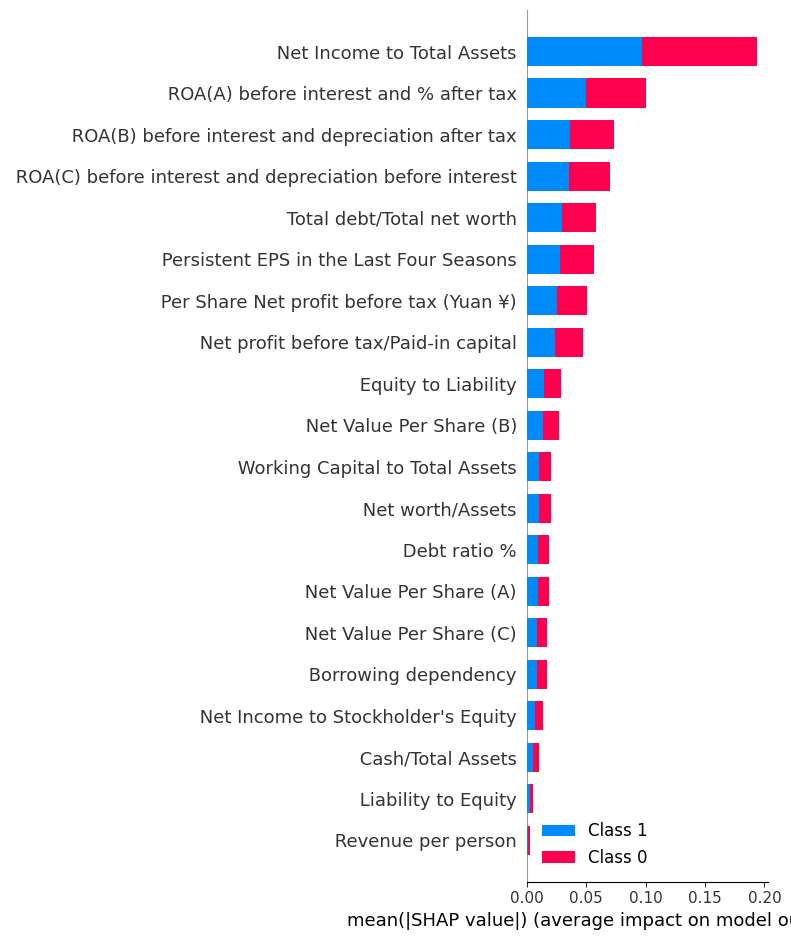

In [25]:
shap.initjs()
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

### Summary Plot for Bankrupt Class

Summary for Single Class - A summary plot for single class gives us density plot.

Below is Summary pplot for Bankrupt class.
* We observe High values of feature Net Income to Total Assets drives the probability down of belonging to Bankrupt class.

* Low Values of Total Debt/ Total net Worth drives down the probability of belonging to Bankrupt class.

These are in accordance to the norm that if debt is lower as compared to net worth of company then it has lower tendency to be bankrupt and vice -versa for Net Income to total Assets i.e. High values of net income /assets ratio also signifies lower tendency of company to go bankrupt.

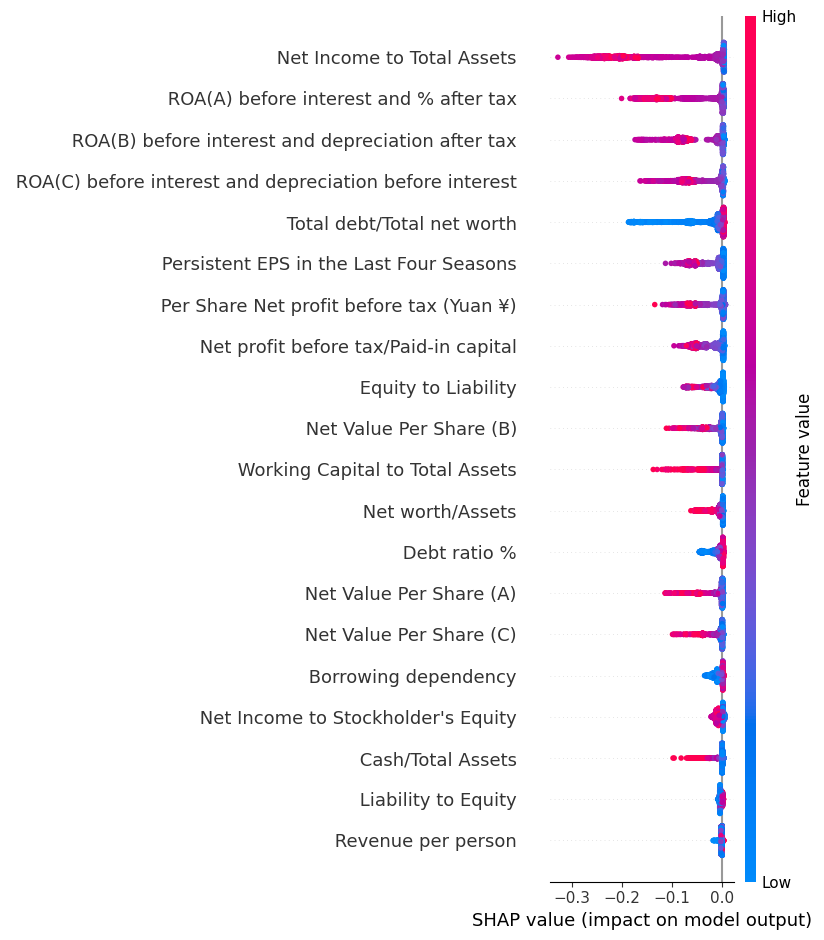

In [26]:
shap.initjs()
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)

## Conclusion

* We successfully saw how to step by step break down a high dimensional dataset to a subset of important features and draw insights as to which features impact the bankruptcy position of company.
*  The results demonstrate that Xgboost and AdaBoost RUS are the best performing models in terms of accuracy, while AdaBoost RUS and Xgboost have the highest F1-score for the positive class (bankrupt).
* After applying IHT under-sampling, the precision for the bankrupt class increases for Isolation Forest.
* Balanced accuracy for all six models increases after applying IHT under-sampling, with the most significant increase observed in Xgboost, Isolation Forest, and Adaboost RUS.
* Using instance hardness threshold (IHT) under-sampling in an imbalanced Taiwanese dataset has been shown to be a promising approach for addressing this challenge. By focusing on the hardest instances in the dataset, this technique has demonstrated the potential to improve the performance of machine learning models for bankruptcy prediction
* The results suggest that IHT under-sampling can effectively reduce the negative impact of class imbalance on model performance, leading to more accurate and reliable predictions.

* Shap Interpretation allows us to understand how the features contribute to the modle predictions and gain better insight on feature understandings.


## Future Scope

* There are several potential avenues for future work in bankruptcy prediction using instance hardness threshold (IHT) under-sampling. It would be beneficial to explore the performance of other machine learning algorithms, such as neural networks or decision trees, with IHT under-sampling for bankruptcy prediction.

* Additionally, it would be interesting to investigate the use of ensemble techniques, such as stacking or boosting, which is based on concept of **"Wisdom of the Crowd"** to further improve the performance of the models.


## References

1. A Cluster-Based Boosting Algorithm for Bankruptcy Prediction in a Highly Imbalanced Dataset. Symmetry, 10(7), 250. https://doi.org/10.3390/sym10070250

2. Cost Sensitive Evaluation of Instance Hardness in Machine Learning. Machine Learning and Knowledge Discovery in Databases, 86–102. https://doi.org/10.1007/978-3-030-46147-8_6
